# RESULTS SECTION

# Part 3 of Coding - DATA ANALYSIS USING MACHINE LEARNING TECHNIQUE ON THE INFORMATION RETRIEVED FROM PART 1 AND PART 2

In [2]:
%reset -f
import gc
gc.collect()

import pandas as pd
import numpy as np
from IPython.display import display, HTML
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import requests

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |    h14c3975_1002         3.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.3.0               |        py36_1001         533 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

    altair:  2.3.0-py36_1001   conda-forge
    branca:  0.3.1-py_0        conda-forge
    folium:  0.5.0-py_0        conda-forge
    vincent: 0.4.

## Importing file on New York Demographic

In [4]:
ny_stats = pd.read_csv("ny_data.csv")
print(ny_stats.shape)
display(HTML(ny_stats.head().to_html()))
#display(HTML(ny_stats.to_html()))

(25, 37)


,zip,city,state,MedianIncome,MedianIncomeRank,CostOfLivingIndex,CostOfLivingRank,MedianMortgageToIncomeRatio,MedianMortgageToIncomeRank,OwnerOccupiedHomesPercent,OwnerOccupiedHomesRank,MedianRoomsInHome,MedianRoomsInHomeRank,CollegeDegreePercent,CollegeDegreeRank,ProfessionalPercent,ProfessionalRank,Population,PopulationRank,AverageHouseholdSize,AverageHouseholdSizeRank,MedianAge,MedianAgeRank,MaleToFemaleRatio,MaleToFemaleRank,MarriedPercent,MarriedRank,DivorcedPercent,DivorcedRank,WhitePercent,WhiteRank,BlackPercent,BlackRank,AsianPercent,AsianRank,HispanicEthnicityPercent,HispanicEthnicityRank
0,10001,New York,NY,40932,56,129.9,67,50.1,99,21.5,1,2.7,0,50.1,94,55.6,96,17007,70,1.9,1,36.4,42,100.2,83,33.1,1,9.2,46,54.2,14,7.9,73,14.3,97,19.8,89
1,10003,New York,NY,60891,87,371.7,97,19.1,19,26.5,2,2.7,0,70.1,99,66.2,99,54084,98,1.8,1,33.7,20,100.4,84,29.6,0,7.6,23,72.9,27,4.0,64,11.8,97,7.4,77
2,10010,New York,NY,62467,89,288.6,95,17.5,4,24.0,1,2.8,0,71.2,99,66.7,99,26471,82,1.7,0,37.6,56,83.5,11,35.2,2,8.6,37,73.0,27,5.7,69,10.1,96,9.3,80
3,10011,New York,NY,61986,88,347.1,96,27.3,96,30.6,2,2.7,0,68.5,99,69.1,99,46694,96,1.6,0,38.5,65,111.2,95,29.5,0,9.3,48,74.6,28,4.4,65,5.8,92,12.2,84
4,10012,New York,NY,58313,85,691.8,99,24.3,86,17.3,1,2.7,0,64.6,98,65.7,99,26031,82,1.8,0,34.6,25,108.0,94,35.7,2,7.0,16,68.6,23,3.0,60,17.4,98,7.2,77


## Importing files 'export_dataframe1.csv' created and stored in Part 1 and 'export_dataframe2.csv' created and stored in Part 2

In [5]:
ny_ff = pd.read_csv('export_dataframe1.csv')
print(ny_ff.shape)
display(HTML(ny_ff.head().to_html()))

ny_ratings = pd.read_csv('export_dataframe2.csv')
print(ny_ratings.shape)
display(HTML(ny_ratings.head().to_html()))

(173, 6)


,zip,Latitude,Longitude,Name,Id,Venue Category
0,10001,40.748724,-74.003422,SUBWAY,4ecbe682f9f4a82587658269,Sandwich Place
1,10001,40.747569,-73.997088,McDonald's,4b1331eef964a5205c9523e3,Fast Food Restaurant
2,10001,40.752250,-74.005727,Enfes,59c143aa6cf01a3c2418005a,Turkish Restaurant
3,10001,40.748357,-74.004128,Subway,5a64e13cea1e445448e69273,Sandwich Place
4,10001,40.746259,-73.997676,Subway,4d6e842538363704f4d8a9d0,Sandwich Place


(173, 4)


,RestaurantId,Likes,Price_Tier,Ratings
0,4ecbe682f9f4a82587658269,4,1,6.1
1,4b1331eef964a5205c9523e3,19,1,5.3
2,59c143aa6cf01a3c2418005a,0,2,0.0
3,5a64e13cea1e445448e69273,0,1,0.0
4,4d6e842538363704f4d8a9d0,0,1,6.0


## Merging Demographic and Restaurant Details data using left margin based on restaurant Ids

In [6]:
df_mapped=pd.merge(ny_ff,ny_ratings,left_on='Id',right_on='RestaurantId',how='left')
df_mapped.drop('RestaurantId',axis=1,inplace=True)
print(df_mapped.shape)
display(HTML(df_mapped.head().to_html()))

(173, 9)


,zip,Latitude,Longitude,Name,Id,Venue Category,Likes,Price_Tier,Ratings
0,10001,40.748724,-74.003422,SUBWAY,4ecbe682f9f4a82587658269,Sandwich Place,4,1,6.1
1,10001,40.747569,-73.997088,McDonald's,4b1331eef964a5205c9523e3,Fast Food Restaurant,19,1,5.3
2,10001,40.752250,-74.005727,Enfes,59c143aa6cf01a3c2418005a,Turkish Restaurant,0,2,0.0
3,10001,40.748357,-74.004128,Subway,5a64e13cea1e445448e69273,Sandwich Place,0,1,0.0
4,10001,40.746259,-73.997676,Subway,4d6e842538363704f4d8a9d0,Sandwich Place,0,1,6.0


In [6]:
df_mapped_grouped = df_mapped.groupby(['zip'])['Likes','Price_Tier','Ratings'].median().reset_index()
df_mapped_grouped.head()

,zip,Likes,Price_Tier,Ratings
0,10001,4.5,1.0,5.95
1,10002,2.0,1.0,4.60
2,10003,47.5,1.0,6.40
3,10005,68.5,1.0,6.30
4,10009,1.0,1.0,5.95


## Merging demographic and restaurant details dataframes

In [12]:
#df_mapped1=pd.merge(ny_stats,df_mapped_grouped,left_on='zip',right_on='zip',how='left')
df_mapped1=pd.merge(ny_stats,df_mapped,left_on='zip',right_on='zip',how='left')
#df_mapped1.drop('zip',axis=1,inplace=True)
df_mapped1=df_mapped1[['MedianIncome','CostOfLivingIndex','Population','MedianAge','Likes','Price_Tier','Ratings']]
df_mapped1.fillna(0, inplace=True)

df_mapped1.drop(df_mapped1[df_mapped1.Ratings==0].index, inplace=True)        # Dropping Ratings with value 0 i.e. data not available
df_mapped1.drop(df_mapped1[df_mapped1.Price_Tier==0].index, inplace=True)     # Dropping Price Tier with value 0 i.e. data not available


print(df_mapped1.shape)
display(HTML(df_mapped1.head().to_html()))
print(sum(df_mapped1['Ratings']==0))
print(sum(df_mapped1['Price_Tier']==0))




(147, 7)


,MedianIncome,CostOfLivingIndex,Population,MedianAge,Likes,Price_Tier,Ratings
0,40932,129.9,17007,36.4,4.0,1.0,6.1
1,40932,129.9,17007,36.4,19.0,1.0,5.3
4,40932,129.9,17007,36.4,0.0,1.0,6.0
5,40932,129.9,17007,36.4,5.0,1.0,6.6
6,40932,129.9,17007,36.4,74.0,1.0,6.1


0
0


## Modeling K-Means clustering

In [13]:
clusterNum=5
k_means=KMeans(init="k-means++",n_clusters=clusterNum,n_init=1200)
k_means.fit(df_mapped1)
labels=k_means.labels_
print(labels)
type(labels)

[3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 4 4 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3]


numpy.ndarray

## Adding K-Means clustering grouping labels to the merged data

In [14]:
df_mapped1['Clus_KM']=labels
display(HTML(df_mapped1.head().to_html()))

,MedianIncome,CostOfLivingIndex,Population,MedianAge,Likes,Price_Tier,Ratings,Clus_KM
0,40932,129.9,17007,36.4,4.0,1.0,6.1,3
1,40932,129.9,17007,36.4,19.0,1.0,5.3,3
4,40932,129.9,17007,36.4,0.0,1.0,6.0,3
5,40932,129.9,17007,36.4,5.0,1.0,6.6,3
6,40932,129.9,17007,36.4,74.0,1.0,6.1,3


In [15]:
df_mapped1.groupby('Clus_KM').mean()
X=df_mapped1.values
#X

## Plotting 2D plot between Income and Ratings

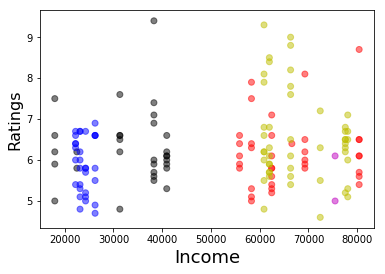

In [17]:
colorset = ['r','b','y','k','m']
c=labels.astype(np.int)
d=[colorset[i] for i in c.flat]
#print(d)

plt.scatter( X[:, 0],  X[:, 6], c=d, alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Ratings', fontsize=16)


plt.show()

#Observation - High ratings cluster is witnessed in the 60000 to 70000 income bracket.


## Plotting 2D plot between Population and Ratings

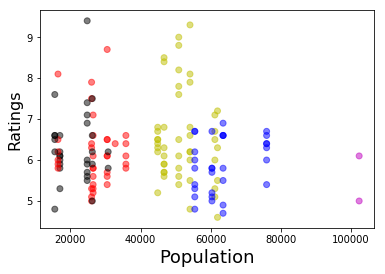

In [18]:
colorset = ['r','b','y','k','m']
c=labels.astype(np.int)
d=[colorset[i] for i in c.flat]
#print(d)

plt.scatter( X[:, 2],  X[:, 6], c=d, alpha=0.5)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Ratings', fontsize=16)


plt.show()

#observations: Highest ratings cluster is seen in medium density regions between 40000 to 60000. Density higher than 60000 has seen relatively lower to average ratings. 
 #   Density between 50000 to 60000 population has seen ratings of 8 and above.

## Plotting 2D plot between Age and Ratings

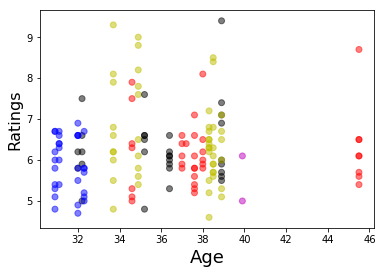

In [19]:
colorset = ['r','b','y','k','m']
c=labels.astype(np.int)
d=[colorset[i] for i in c.flat]
#print(d)

plt.scatter( X[:, 3],  X[:, 6], c=d, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Ratings', fontsize=16)


plt.show()

#Observations : Fast food does not seem to be popular among high aged (age>40) people except for people in the age group of 46. People aged between 34 to 36 years have provided
 #   the highest ratings followed by people in the age group of 38 to 39. Middle and higher aged people may be health conscious or might be having 
  #  other responsibilities like family expenses or medical expenses.

## Plotting 2D plot between Price_Tier and Ratings

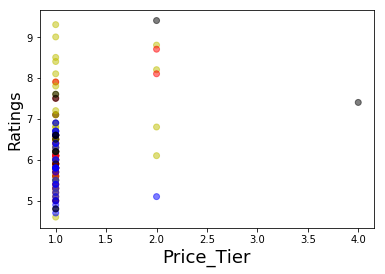

In [20]:
colorset = ['r','b','y','k','m']
c=labels.astype(np.int)
d=[colorset[i] for i in c.flat]
#print(d)

plt.scatter( X[:, 5],  X[:, 6], c=d, alpha=0.5)
plt.xlabel('Price_Tier', fontsize=18)
plt.ylabel('Ratings', fontsize=16)


plt.show()

#observation : Fast food restaurants which serve food in the price tier of 1 (i.e. cheaper) has achieved the highest ratings ranging from 4 to 9.5.
 #   So price is an important choice criteria for fast food restaurants.

## Plotting 3D plot among Income, Age and Ratings

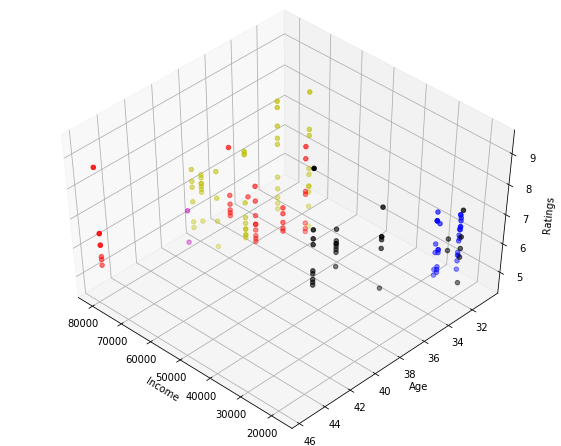

In [21]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Ratings')

ax.scatter(X[:, 0], X[:, 3], X[:, 6], c= d)

#Observation : Fast food is liked by three distinct category of people. One, Higher income and lower age which provide ratings between 4 to 8.
 #   Two, Higher income and middle aged which provide ratings between 4 to 6. And three lower income and younger age group which provide ratings between 4 to 6.
  #  There is also a small cluster of lower age and higher income which have provided lower ratings.

## Plotting 3D plot among Income, Age and Price_Tier

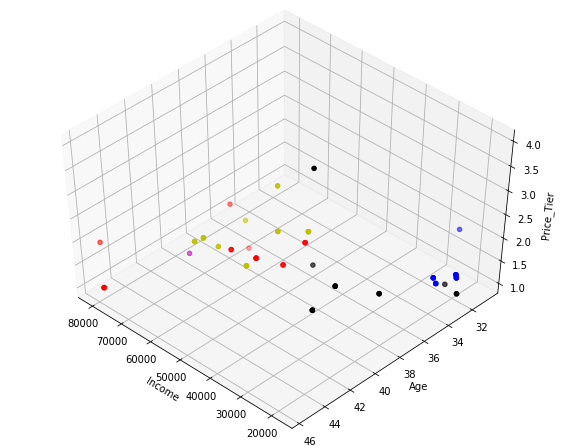

In [22]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Price_Tier')

ax.scatter(X[:, 0], X[:, 3], X[:, 5], c= d)

#Observation - Low price tier restaurants are dense with any income and any age groups.

## Plotting 3D plot among Age, Price_Tier and Ratings

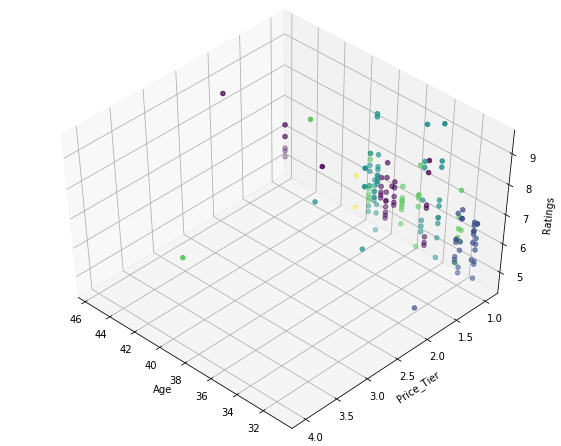

In [24]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Price_Tier')
ax.set_zlabel('Ratings')

ax.scatter(X[:, 3], X[:, 5], X[:, 6], c= labels.astype(np.float))

#Observation: Higher ratings are received when there are lower age group within low price tier restaurants.

## Plotting 3D plot among Income, Population and Ratings

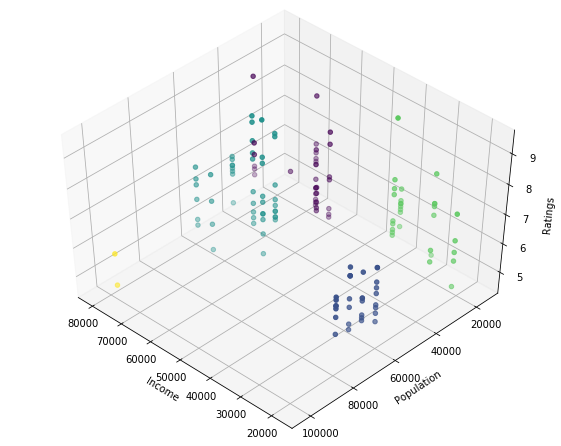

In [27]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Income')
ax.set_ylabel('Population')
ax.set_zlabel('Ratings')

ax.scatter(X[:, 0], X[:, 2], X[:, 6], c= labels.astype(np.float))

#Observation: Low dense area with higher income group like fast food.

## Plotting 3D plot among Population, Age and Ratings

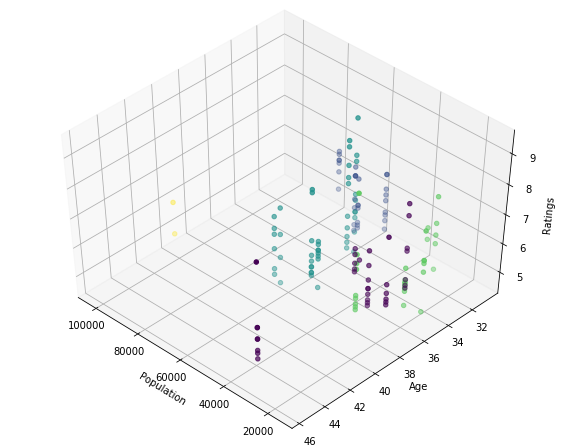

In [28]:

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Population')
ax.set_ylabel('Age')
ax.set_zlabel('Ratings')

ax.scatter(X[:, 2], X[:, 3], X[:, 6], c= labels.astype(np.float))

#Observation: Low dense area with lower age group like fast food.